In [1]:
using Distributions
using Optim
using PyPlot
# not really sure why plt[:style]... doesn't just work
matplotlib[:pyplot][:style][:use]("ggplot")

In [2]:
x = [0.4; 0.6]
t = [0.05; -0.35]
alpha = 2.
beta = 10.

10.0

In [3]:
function calc_pred_dist(x, xs, t, alpha, beta)
    N = length(xs)
    S_N = ([alpha 0; 0 alpha] + N*beta*[1 mean(xs); mean(xs) mean(xs .* xs)])^-1
    mx = N*beta*[1 x]*S_N*[mean(t); mean(xs.*t);]
    s2x = beta^-1 + [1 x]*S_N*[1; x]
    mx[1], s2x[1]
end

calc_pred_dist (generic function with 1 method)

In [4]:
vs = linspace(0, 1, 100)
pred_dist = [calc_pred_dist(v, x, t, alpha, beta) for v in vs]
mus = [d[1] for d in pred_dist]
stds = [d[2] for d in pred_dist]
fill_between(v, mus + stds, mus - stds, facecolor=(1.0, 0.8, 0.8))
plot(v, mus)
scatter(x, t)
xlabel(L"$x$")
ylabel(L"$t$")

LoadError: LoadError: UndefVarError: v not defined
while loading In[4], in expression starting on line 5

In [5]:
function p_w(x, t, alpha, beta)
    N = length(x)
    S = ([alpha 0; 0 alpha] + N*beta*[1 mean(x); mean(x) mean(x.*x)])^-1
    m = N*beta*S*[mean(t); mean(x.*t)]
    m, S
end

p_w (generic function with 1 method)

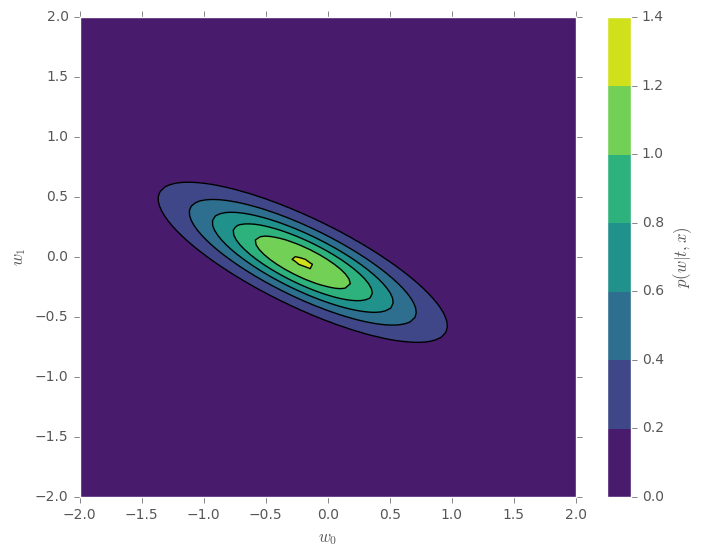

In [6]:
m_N, S_N = p_w(x, t, alpha, beta)
weights_dist = MvNormal(m_N, S_N)

n = 100
w_0 = linspace(-2, 2, n)
w_1 = linspace(-2, 2, n)
xgrid = repmat(w_0', n, 1)
ygrid = repmat(w_1, 1, n)

z = zeros(n,n)

for i in 1:n
    for j in 1:n
        z[i:i,j:j] = pdf(weights_dist, [w_0[i];w_1[j]])
    end
end
contour(xgrid, ygrid, z, linewidths=1, colors="k")
contourf(xgrid, ygrid, z, cmap=ColorMap("viridis"))
cb = colorbar()
cb[:set_label](L"$p(w|t, x)$")
xlabel(L"$w_0$")
ylabel(L"$w_1$")
savefig("plots/pw.png", bbox_inches="tight", dpi=300)

In [7]:
function f(x, w)
    [1 x] * w
end

f (generic function with 1 method)

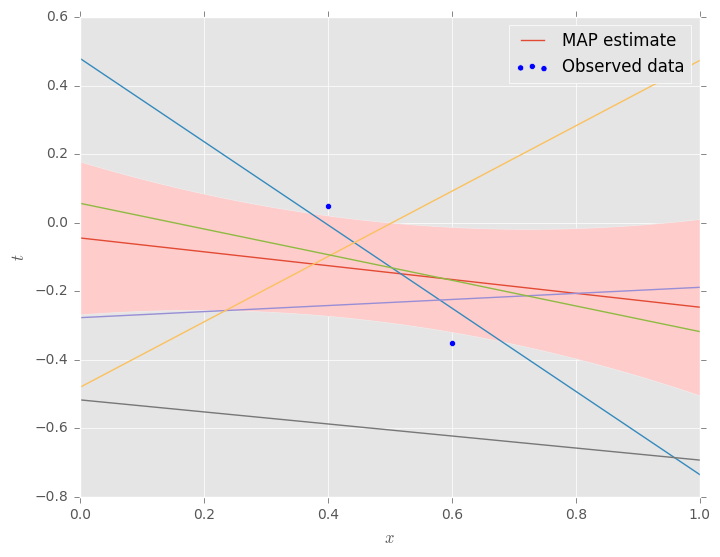

In [8]:
vs = linspace(0, 1, 100)
pred_dist = [calc_pred_dist(v, x, t, alpha, beta) for v in vs]
mus = [d[1] for d in pred_dist]
stds = [d[2] for d in pred_dist]
fill_between(vs, mus + stds, mus - stds, facecolor=(1.0, 0.8, 0.8))
plot(vs, mus, label="MAP estimate")
for _ in 1:5
    w = rand(weights_dist)
    y = [f(v, w) for v in vs]
    plot(vs, y)
end
scatter(x, t, label="Observed data")
xlabel(L"$x$")
ylabel(L"$t$")
xlim(0, 1)
legend()
savefig("plots/blr.png", bbox_inches="tight", dpi=300)

In [9]:
function nr_sin(x)
    x + cos(x)/sin(x)
end

nr_sin (generic function with 1 method)

Highest value: x=-1.5707963267948966, y=-1.0


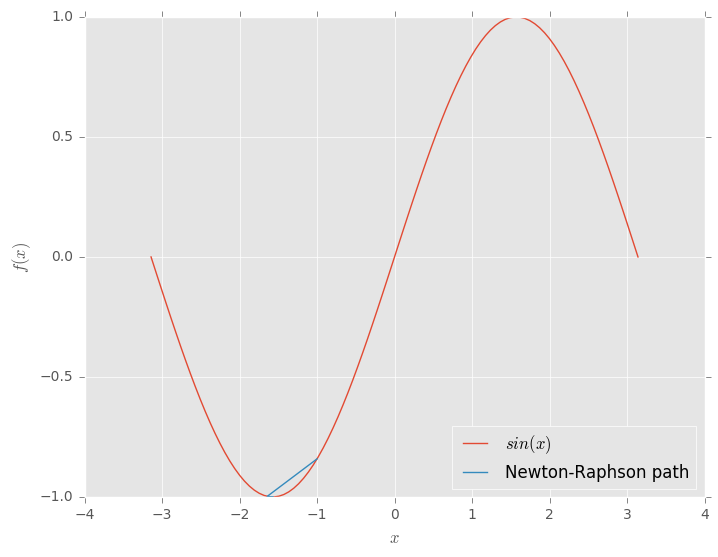

[-1.0,-1.64209,-1.57068,-1.5708,-1.5708,-1.5708]


PyObject <matplotlib.legend.Legend object at 0x000000001F1135F8>

In [10]:
xs = linspace(-pi, pi, 100)
y = sin(xs)
xpath = [-1.]
for _ in 1:5
    append!(xpath, nr_sin(xpath[end]))
end
println("Highest value: x=$(xpath[end]), y=$(sin(xpath[end]))")
println(xpath)
plot(xs, y, label=L"$sin(x)$")
plot(xpath, sin(xpath), label="Newton-Raphson path")
xlabel(L"$x$")
ylabel(L"$f(x)$")
legend(loc=4)


## Logistic Regression

In [11]:
phi = [1 1 1 1; 0.3 0.44 0.46 0.6]
t = float([1, 0, 1, 0])
N = length(t)

  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31

4

In [12]:
w =[1, 1]
for _ in 1:5
    y = reshape(1. ./ (1+exp(-w' * phi)), N)
    R = diagm(y .* (1-y))
    z = phi' * w - inv(R) * (y - t)
    w = inv(phi*R*phi') * phi * R * z
    println(w)
end

.


[8.93409,-21.446]
[9.07164,-20.0288]
[9.69751,-21.5458]
[9.78116,-21.7359]
[9.78228,-21.7384]


  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Joris\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Joris\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Joris\.julia\v

In [13]:
data = readdlm("a010_irlsdata.txt")
X = data[:, 1:2]
C = data[:, 3]

  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Joris\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Joris\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Joris\.julia\v0.5\PyCall\src\PyCall.jl


1000-element Array{Float64,1}:
 1.0
 0.0
 0.0
 1.0
 1.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 0.0
 ⋮  
 1.0
 0.0
 0.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 0.0
 0.0

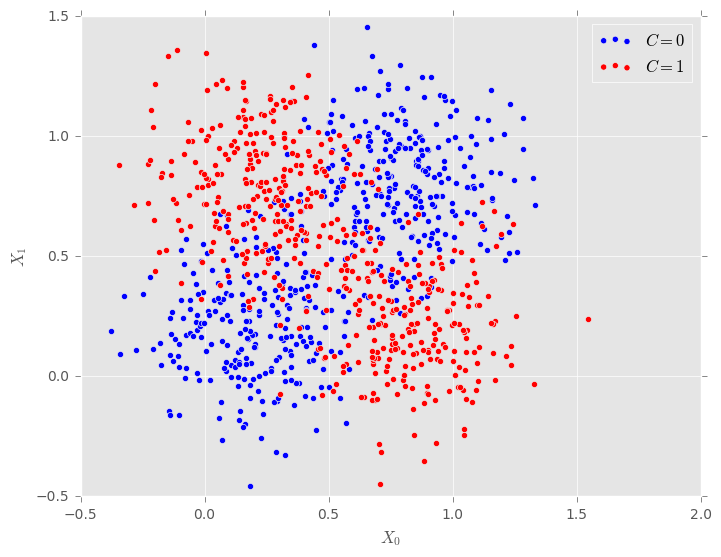

In [14]:
scatter(X[C .== 0, 1], X[C .== 0, 2], c="b", label=L"$C=0$")
scatter(X[C .== 1, 1], X[C .== 1, 2], c="r", label=L"$C=1$")
ylim(-0.5, 1.5)
xlabel(L"$X_0$")
ylabel(L"$X_1$")
legend()
savefig("plots/scatter.png", bbox_inches="tight", dpi=300)

In [15]:
w = [0, 0, 0]
phi = [1; X_1, X_2] # TODO
for _ in 1:5
    y = reshape(1. ./ (1+exp(-w' * phi)), N)
    R = diagm(y .* (1-y))
    z = phi' * w - inv(R) * (y - t)
    w = inv(phi*R*phi') * phi * R * z
    println(w)
end

LoadError: LoadError: DimensionMismatch("matrix A has dimensions (1,3), matrix B has dimensions (2,4)")
while loading In[15], in expression starting on line 2